GALEX data for XRBs.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from astropy import units as u
from astropy.coordinates import SkyCoord

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


First, let's read the 2007 LMXB catalogue:

In [2]:
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

def make_int(text):
    return int(text.strip('" '))

In [3]:

lmxb_cat = pd.read_csv("../data/lmxb_cat.dat", sep="|", skipinitialspace=True,
                        names=["name", "ra", "dec", "vmag", "bv_color", "porb", "flux_limit",
                              "flux", "flux_max", "xray_type", "pulse_period", "alt_name_1",
                              "alt_name_2"],
                        converters = {'name' : strip,
                                      'ra' : strip,
                                      'dec' : strip,
                                      'vmag' : strip,
                                      'bv_color': strip,
                                      "porb": strip,
                                      "flux_limit": strip,
                                      "flux": strip,
                                      "flux_max": strip,
                                      "xray_type": strip,
                                      "pulse_period": strip,
                                      "alt_name_1": strip,
                                      "alt_name_2": strip},
                       usecols=range(1,14,1), index_col=False,
                       skiprows=1)

In [4]:
lmxb_cat.head()

,name,ra,dec,vmag,bv_color,porb,flux_limit,flux,flux_max,xray_type,pulse_period,alt_name_1,alt_name_2
0,SAX J1603.9-7753,16 03 54.00,-77 53 06.0,,,,,160.00,,"T, B",,,
1,2A 0521-720,05 20 28.04,-71 57 53.3,18.00,0.00,0.3400,,9.00,44,Z,,LMC X-2,
2,RX J0532.7-6926,05 32 42.80,-69 26 18.0,,,,,0.50,,,,,
3,4U 1254-69,12 57 37.20,-69 17 20.8,19.10,0.30,0.1638,,25.00,,"B, D",,,
4,GS 1124-684,11 26 26.70,-68 40 32.6,13.30,0.30,0.4325,,3000.00,,"T, U, R",,N Mus 1991,


In [5]:
ra_all = np.array(lmxb_cat["ra"])
dec_all = np.array(lmxb_cat["dec"])

In [6]:
coords_all = [SkyCoord("%s %s"%(ra, dec), unit=(u.hourangle, u.deg)) \
              for ra,dec in zip(ra_all, dec_all)]

Now we can use `gPhoton.gFind` to search for observations of LMXBs:

In [7]:
from gPhoton.gFind import gFind

In [8]:
for c in coords_all[:5]:
    gFind(band='NUV',skypos=[c.ra.degree,c.dec.degree])

No NUV exposure time in database.
NUV: 4093.0s (raw) in 4 exposures.
    [ 998731366.995, 998732435.995 ], 1069.000 seconds
    [ 1003054424.995, 1003055880.995 ], 1456.000 seconds
    [ 1003066256.995, 1003067714.995 ], 1458.000 seconds
    [ 1003410169.995, 1003410279.995 ], 110.000 seconds
NUV: 1221.0s (raw) in 1 exposures.
    [ 1010837477.995, 1010838698.995 ], 1221.000 seconds
No NUV exposure time in database.
NUV: 197.0s (raw) in 2 exposures.
    [ 989255562.995, 989255670.995 ], 108.000 seconds
    [ 1012056105.995, 1012056194.995 ], 89.000 seconds


In [9]:
c = coords_all[1]
res = gFind(band='NUV',skypos=[c.ra.degree,c.dec.degree])

NUV: 4093.0s (raw) in 4 exposures.
    [ 998731366.995, 998732435.995 ], 1069.000 seconds
    [ 1003054424.995, 1003055880.995 ], 1456.000 seconds
    [ 1003066256.995, 1003067714.995 ], 1458.000 seconds
    [ 1003410169.995, 1003410279.995 ], 110.000 seconds


In [10]:
res

{'NUV': {'expt': 4093.0,
  't0': array([  9.98731367e+08,   1.00305442e+09,   1.00306626e+09,
           1.00341017e+09]),
  't1': array([  9.98732436e+08,   1.00305588e+09,   1.00306771e+09,
           1.00341028e+09])}}

In [11]:
print([res["NUV"]["t0"][0], res["NUV"]["t1"][0]])
print(res["NUV"]["t1"][0] - res["NUV"]["t0"][0])


[998731366.995, 998732435.995]
1069.0


Now let's extract some data in the near-UV:

In [12]:
from gPhoton.gAperture import gAperture

In [13]:
d = gAperture(band="NUV", skypos=[c.ra.degree,c.dec.degree],radius=0.03,annulus=[0.03,0.04],
              trange=[res["NUV"]["t0"][0], res["NUV"]["t1"][0]], stepsz=1.0,
              csvfile="galex_lmxb_test.csv")

In [14]:
lc_df = pd.read_csv("galex_lmxb_test.csv")

In [15]:
lc_df.head()

,t0,t1,exptime,mag_bgsub_cheese,t_mean,t0_data,t1_data,cps,counts,bg,mag,mag_bgsub,flux,flux_bgsub,flux_bgsub_cheese,bg_cheese,detx,dety,detrad,response
0,9.987314e+08,9.987314e+08,0.613186,15.355585,9.987314e+08,9.987314e+08,9.987314e+08,245.998556,120,163.341699,14.102669,NaN,5.067570e-14,-4.198973e-15,1.598208e-14,103.270144,385.358551,294.608398,106.403767,0.795859
1,9.987314e+08,9.987314e+08,0.613526,15.087778,9.987314e+08,9.987314e+08,9.987314e+08,260.312038,127,157.500551,14.041264,18.689740,5.362428e-14,7.412610e-16,2.045295e-14,98.793593,384.180023,295.090149,106.095940,0.795505
2,9.987314e+08,9.987314e+08,0.614948,15.143945,9.987314e+08,9.987314e+08,9.987314e+08,260.839842,128,161.452517,14.039065,NaN,5.373301e-14,-3.515588e-16,1.942178e-14,102.425402,384.305389,294.201019,106.956744,0.798253
3,9.987314e+08,9.987314e+08,0.613622,15.026398,9.987314e+08,9.987314e+08,9.987314e+08,255.363664,125,145.233346,14.062102,16.901457,5.260491e-14,3.848437e-15,2.164252e-14,92.229220,384.686584,294.259186,106.843907,0.797946
4,9.987314e+08,9.987314e+08,0.612551,16.023587,9.987314e+08,9.987314e+08,9.987314e+08,241.394007,118,191.655646,14.123184,NaN,4.972717e-14,-1.472630e-14,8.638383e-15,122.179585,383.345673,293.774384,107.523245,0.798317


Let's look what the actual intervals between photon arrival times look like:

In [16]:
t_mid = lc_df["t0"] + (lc_df["t1"]-lc_df["t0"])/2.

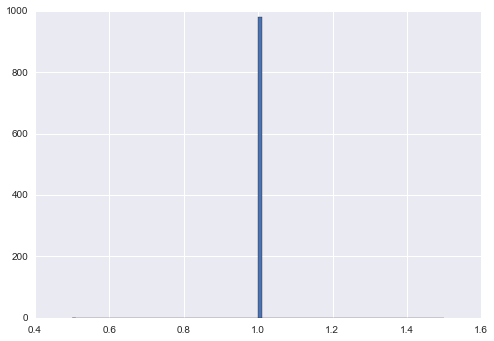

In [17]:
plt.hist((lc_df["t1"]-lc_df["t0"]), bins=100);

And the light curve?

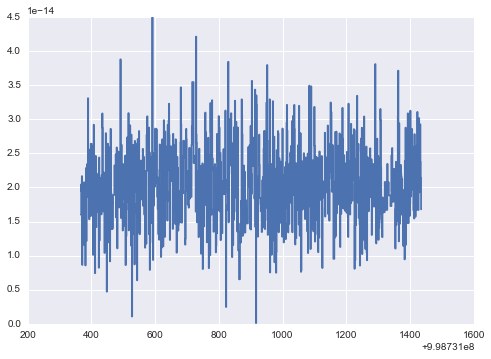

In [18]:
plt.plot(t_mid, lc_df["flux_bgsub_cheese"], linestyle="steps-mid")

The photon arrival times are here:

In [19]:
times = d["photons"]["t"]

We'll need to save the data in some sane format. Let's play around with the data until we can find a way to save the data to disk in a useful way.

At the moment, we'll just save the photons in an HDF5 file.

In [20]:
df = pd.DataFrame(d["photons"])

In [21]:
fn = "".join(lmxb_cat.loc[1,"name"].split())
fn

'2A0521-720'

In [22]:
df.to_hdf('../data/%s_photons.h5'%fn,'table',append=False)


In [24]:
df_new = pd.read_hdf('../data/%s_photons.h5'%fn, "table")

In [25]:
df_new.head()

,col,dec,eta,flat,ra,response,row,scale,t,x,xi,y
0,361.809509,-72.003068,-6754.742188,0.822079,80.134384,0.800959,287.420959,0.974308,9.987314e+08,-3379.835938,-2291.428955,-9429.670898
1,362.825195,-72.001794,-6776.082031,0.820565,80.130274,0.799484,287.065308,0.974308,9.987314e+08,-3267.102051,-2230.487061,-9543.928711
2,362.222748,-72.001891,-6711.184082,0.831968,80.136865,0.810594,288.146912,0.974308,9.987314e+08,-3338.538086,-2266.635010,-9466.947266
3,362.832428,-72.001745,-6777.476074,0.820565,80.129999,0.799484,287.042084,0.974308,9.987314e+08,-3256.293945,-2230.054932,-9487.547852
4,362.669861,-72.000729,-6673.559082,0.831968,80.138769,0.810594,288.774017,0.974308,9.987314e+08,-3280.545898,-2239.809082,-9389.853516


I guess we should do that for all the data!

In [26]:
def read_catalogue(filename, band="NUV", dt=10.0, target_dir="./", start_ind=0, end_ind=None):
    """
    Read Galex Data for some of the catalogues I've got.
    Note: This will only work with the LMXB and HMXB catalogue files in the 
    data directory!
    
    Everything else is probably not going to be in the right format. However, 
    the code below should be adaptable to whatever format your catalogue is in!
    
    Parameters
    ----------
    filename: string
        The file name (including path) to your catalogue file
    
    band: {"NUV | "FUV"}, optional, default "NUV"
        The band to scrape the data from; either NUV (near UV) or FUV (far UV)
        TODO: check whether there are more than two bands!
    
    dt: float, optional, default 10
        The desired time resolution of the output light curve
    
    target_dir: string, optional, default "./"
        The target directory for the output data, default is the current working directory
    
    start_ind: int, optional, default 0
        If you want to load fewer rows from the catalogue file, this is the 
        index of the row you'd like to start with
    end_ind: int, optional, default None
        If you want to load fewer rows from the catalogue file, this is the 
        index of the row you'd like to end with.
        If None, then this will be set to the last row in the catalogue.
        
    """
    
    ## read in the catalogue
    cat = pd.read_csv(filename, sep="|", skipinitialspace=True,
                        names=["name", "ra", "dec", "vmag", "bv_color", "porb", "flux_limit",
                              "flux", "flux_max", "xray_type", "pulse_period", "alt_name_1",
                              "alt_name_2"],
                        converters = {'name' : strip,
                                      'ra' : strip,
                                      'dec' : strip,
                                      'vmag' : strip,
                                      'bv_color': strip,
                                      "porb": strip,
                                      "flux_limit": strip,
                                      "flux": strip,
                                      "flux_max": strip,
                                      "xray_type": strip,
                                      "pulse_period": strip,
                                      "alt_name_1": strip,
                                      "alt_name_2": strip},
                       usecols=range(1,14,1), index_col=False,
                       skiprows=1)
    
    ## extract RA and Dec:
    ra_all = np.array(cat["ra"])
    dec_all = np.array(cat["dec"])
    
    ## store in coords object:
    coords_all = [SkyCoord("%s %s"%(ra, dec), unit=(u.hourangle, u.deg)) \
              for ra,dec in zip(ra_all, dec_all)]
    

    ## if the last index is None, then the last item of the 
    ## coordinate list is the final index to search through
    if end_ind is None:
        end_ind = len(coods_all)
        
        
    for i,c in enumerate(coords_all[start_ind:end_ind]):
        ## remove white spaces from object identifier
        obj_id = "".join(cat.loc[i,"name"].split())
        search_galex(c, band, dt, obj_id, target_dir)
    return

def search_galex(coords, band, dt, obj_id, target_dir="./"):
    """
    Search the GALEX gPhoton database for observations at a specific set 
    of coordinates, and if data exists, download it and save it to disc.
    
    Parameters
    ----------
    coords: astropy.coordinates.SkyCoord object
        an object with the sky coordinates where to look for GALEX data
    
    band: {"NUV" | "FUV"}
        Look for data in the near-UV or far-UV?
    
    dt: float
        The desired time resolution of the output light curve
    
    obj_id: string
        The object identifier to be used to save the data
        
    target_dir: string, optional, default "./"
        The directory to store the data in. By default the current working directory
    
    """
    ## use gFind to see if there's data in GALEX
    res = gFind(band=band,skypos=[coords.ra.degree,coords.dec.degree])
    ## if not, continue
    if res[band]["expt"] == 0:
        return
    else:
        tstart = res[band]["t0"]
        tend = res[band]["t1"]
        #print(tstart[0])
        #print(tend[0])
        for i,(ts, te) in enumerate(zip(tstart, tend)):
            ## otherwise find the object's name and fetch the data
            d = gAperture(band=band, skypos=[coords.ra.degree,coords.dec.degree],radius=0.03,
                          annulus=[0.03,0.04], trange=[ts, te], stepsz=dt,
                          csvfile="%s%s_%s_lc%i.dat"%(target_dir, obj_id, band, i))
            ## move photons into a DataFrame
            df = pd.DataFrame(d["photons"])
            ## store in HDF5 file:
            df.to_hdf('%s%s_%s_%i_photons.h5'%(target_dir,obj_id, band, i),
                      'table',append=False)

    return

In [46]:
read_catalogue("../data/lmxb_cat.dat", dt=10.0,target_dir="../data/", end_ind=5)

No NUV exposure time in database.
NUV: 4093.0s (raw) in 4 exposures.
    [ 998731366.995, 998732435.995 ], 1069.000 seconds
    [ 1003054424.995, 1003055880.995 ], 1456.000 seconds
    [ 1003066256.995, 1003067714.995 ], 1458.000 seconds
    [ 1003410169.995, 1003410279.995 ], 110.000 seconds
NUV: 1221.0s (raw) in 1 exposures.
    [ 1010837477.995, 1010838698.995 ], 1221.000 seconds
No NUV exposure time in database.
NUV: 197.0s (raw) in 2 exposures.
    [ 989255562.995, 989255670.995 ], 108.000 seconds
    [ 1012056105.995, 1012056194.995 ], 89.000 seconds


Let's test whether that worked!

In [27]:
df_new = pd.read_hdf("../data/GS1124-684_photons.h5", "table")

IOError: File ../data/GS1124-684_photons.h5 does not exist

In [28]:
df_new.head()

,col,dec,eta,flat,ra,response,row,scale,t,x,xi,y
0,361.809509,-72.003068,-6754.742188,0.822079,80.134384,0.800959,287.420959,0.974308,9.987314e+08,-3379.835938,-2291.428955,-9429.670898
1,362.825195,-72.001794,-6776.082031,0.820565,80.130274,0.799484,287.065308,0.974308,9.987314e+08,-3267.102051,-2230.487061,-9543.928711
2,362.222748,-72.001891,-6711.184082,0.831968,80.136865,0.810594,288.146912,0.974308,9.987314e+08,-3338.538086,-2266.635010,-9466.947266
3,362.832428,-72.001745,-6777.476074,0.820565,80.129999,0.799484,287.042084,0.974308,9.987314e+08,-3256.293945,-2230.054932,-9487.547852
4,362.669861,-72.000729,-6673.559082,0.831968,80.138769,0.810594,288.774017,0.974308,9.987314e+08,-3280.545898,-2239.809082,-9389.853516


Yay! We have data!

Let's make a light curve:

In [29]:
from stingray import Lightcurve

In [30]:

times = np.array(df_new["t"])
lc = Lightcurve.make_lightcurve(times, dt=10.0)

tseg: 1023.79499996
timebin:  102


What do the intervals between adjacent photons look like? If they have a specific scale, then there's likely a finite time resolution I need to worry about:

In [31]:
dt = np.diff(times)

In [32]:
np.where(np.isnan(np.log(dt)))

(array([ 24917,  48287,  74265,  96059, 117223, 147753, 171960, 203093,
        228194, 243037]),)

In [33]:
len(np.where(dt > 1.4)[0])

230

(0, 10)

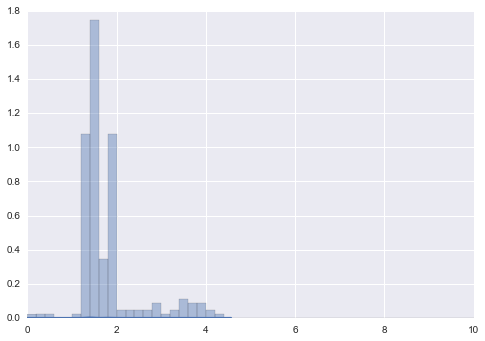

In [34]:
log_dt = np.log(dt)
sns.distplot(log_dt[np.isnan(log_dt)==False], hist_kws={"range":[0,10]})
plt.xlim([0,10])

There's a peak around 1.4 seconds. I should look up that time resolution within the GALEX user guide!

In [35]:
break_ind = np.where(dt > 10.0)[0]

In [36]:
lc1 = Lightcurve.make_lightcurve(times[:break_ind[0]], dt=0.1)
#lc2 = Lightcurve.make_lightcurve(times[break_ind[0]+1:break_ind[1]], dt=0.1)
#lc3 = Lightcurve.make_lightcurve(times[break_ind[1]+1:break_ind[2]], dt=0.1)

tseg: 1067.85500002
timebin:  10678


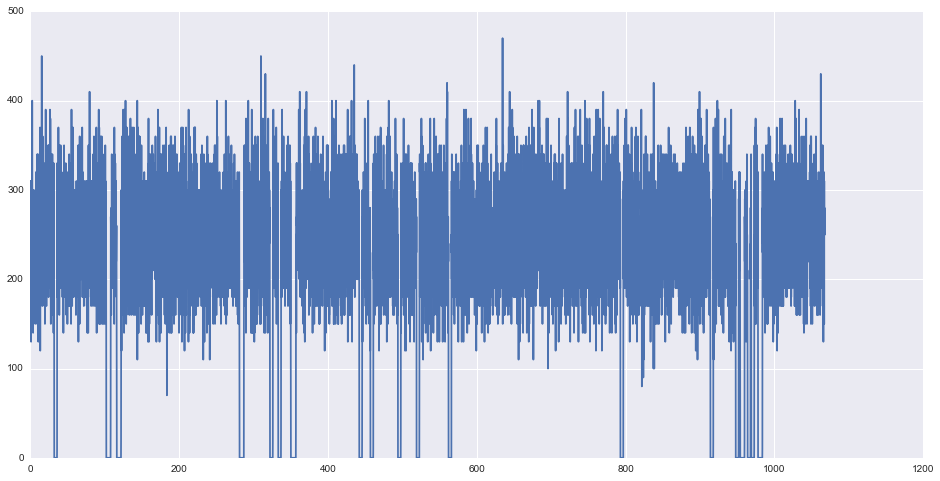

In [37]:
plt.figure(figsize=(16,8))
plt.plot(lc1.time-lc1.time[0], lc1.countrate)

#plt.figure(figsize=(16,8))
#plt.plot(lc2.time-lc2.time[0], lc2.countrate)

#plt.figure(figsize=(16,8))
#plt.plot(lc3.time-lc3.time[0], lc3.countrate)

Let's look what the periodogram looks like! At this point, this is really just something to squint at! There are gaps in the data I'll need to take into account properly!

In [38]:
from stingray import Powerspectrum

In [39]:
ps = Powerspectrum(lc1, norm="rms")

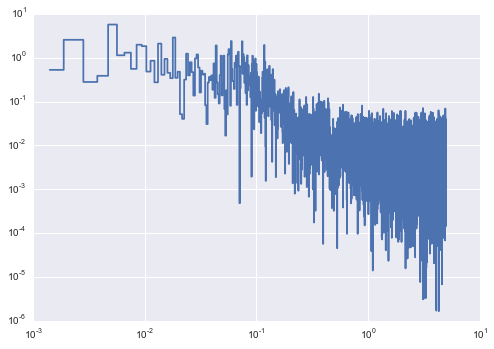

In [40]:
plt.loglog(ps.freq[1:], ps.ps[1:], linestyle="steps-mid")

In [41]:
lfreq, lps, nsamp = ps.rebin_log(0.1)

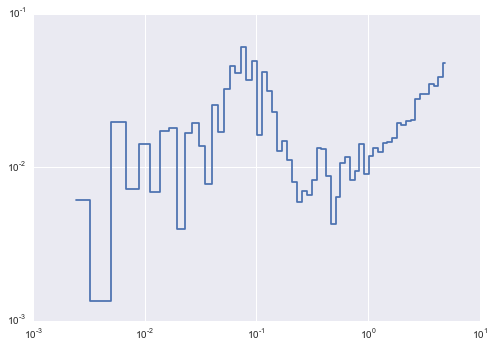

In [42]:
plt.loglog(lfreq[1:], lps[1:]*lfreq[1:], linestyle="steps-mid")

So that looks like there's significant variability in the UV. But there are a lot of systematics I haven't looked into, so I might be completely wrong!